# Lab 1
Student Name: Rayyan Bilal

Student ID: 501053067

Video URL: https://drive.google.com/drive/folders/1wHRxN99E3fZoEr5RrVQsbXQHb-M-MohV

https://youtu.be/7tXHMODTx9w


# **Linear Regression using Standardized Data**

**Loading the Data Set:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


marks = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print(marks)

m = -0.5
b = 0
x = np.linspace(25,71,100)
y = m*x+b


    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]


**Mean and Standard Deviation Calculations:**

In [ ]:
mean_midterm = marks['Midterm mark'].mean()
mean_final = marks['Final mark'].mean()

std_mid = marks['Midterm mark'].std()
std_final = marks['Final mark'].std()

print("Midterm Standard Deviation:", std_mid)
print("Final Standard Deviation:",mean_final)

print("Midterm Mean:", mean_midterm)
print("Final Mean:",mean_final)

Midterm Standard Deviation: 9.746494785617061
Final Standard Deviation: 72.735
Midterm Mean: 48.959
Final Mean: 72.735


**Standardization:**

In [ ]:
x_standardized = (marks['Midterm mark'] - mean_midterm)/std_mid
y_standardized = (marks['Final mark'] - mean_final)/std_final
print(x_standardized)
print("\n")
print(y_standardized)

0    -1.688710
1     0.455651
2     1.286719
3    -0.149695
4     1.112297
        ...   
95    0.106808
96    0.024727
97    0.106808
98   -0.088134
99   -2.447957
Name: Midterm mark, Length: 100, dtype: float64


0    -2.463344
1    -0.236219
2    -0.608407
3    -0.074137
4     0.868339
        ...   
95    0.526166
96   -0.038119
97    0.748278
98   -0.392298
99   -1.154683
Name: Final mark, Length: 100, dtype: float64


**Error (Cost Function) Initialization:**

In [ ]:
def mean_squared_error(y_true, y_pred):
    """
    Calculates the mean squared error between the true values and the predicted values.

    Arguments:
    y_true -- numpy array or pandas Series, true values
    y_pred -- numpy array or pandas Series, predicted values

    Returns:
    mse -- float, mean squared error
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse


# Assuming you have already trained your linear regression model and obtained the predicted values
# Let's say the true final marks are stored in `y_true` and the predicted final marks are stored in `y_pred`

y_true = y_standardized
y_pred = m * x_standardized + b  # Example of predicted values using your existing implementation

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.0032433621324923


**Gradient Partial Derivatives:**



In [ ]:
dm = (2 / len(x_standardized)) * np.sum((y_pred - y_standardized) * x_standardized)
db = (2 / len(x_standardized)) * np.sum((y_pred - y_standardized))

print("Partial Derivative with respect to m:", dm)
print("Partial Derivative with respect to b:", db)

Partial Derivative with respect to m: -2.521486724264985
Partial Derivative with respect to b: 2.486899575160351e-16


**Updating m and b using:**

In [ ]:
alpha = 0.0001  # Learning rate

# Updating of values of m and b using gradient descent using learning rate
m = m - alpha * dm
b = b - alpha * db

print("Updated m:", m)
print("Updated b:", b)

Updated m: -0.4997478513275735
Updated b: -2.486899575160351e-20


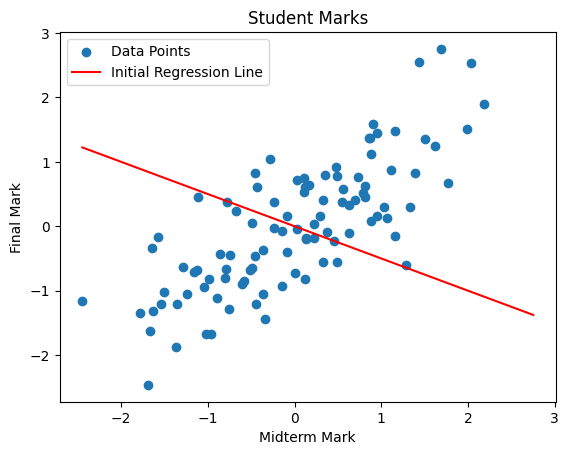

In [ ]:
plt.scatter(x_standardized, y_standardized, label='Data Points')

# Generate x values for the regression line
x = np.linspace(min(x_standardized), max(y_standardized), 100)

# Calculate the corresponding y values for the regression line
y = -0.5 * x

# Plot the regression line
plt.plot(x, y, color='red', label='Initial Regression Line')

plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.title('Student Marks')
plt.legend()
plt.show()

The initial regression line has values m=-0.5, b=0 and alpha = 0.0001. It is evident that this regression is not a good fit for modelling the data.

**Updating m and b (100 iterations):**

Updated m: -0.47478346812862643
Updated b: -2.5321966745650572e-18


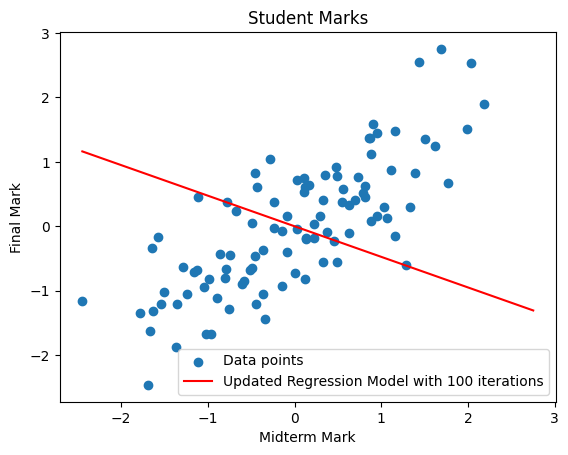

In [ ]:
#sets the number of iteration
num_iterations = 100
#looping gradient descent algorithm
for _ in range(num_iterations):
    #Predicted value calculations
    y_pred = m * x_standardized + b

    dm = (2 / len(x_standardized)) * np.sum((y_pred - y_standardized) * x_standardized)
    db = (2 / len(x_standardized)) * np.sum((y_pred - y_standardized))

    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(x_standardized, y_standardized, label = 'Data points')
x = np.linspace(min(x_standardized), max(y_standardized), 100)
y = m*x+b
plt.plot(x, y, color = 'red', label = 'Updated Regression Model with 100 iterations')

print("Updated m:", m)
print("Updated b:", b)

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Student Marks')
plt.legend()
plt.show()

This model has been updated 100 times and shows very little change

**Error at each iteration after 100 iterations:**

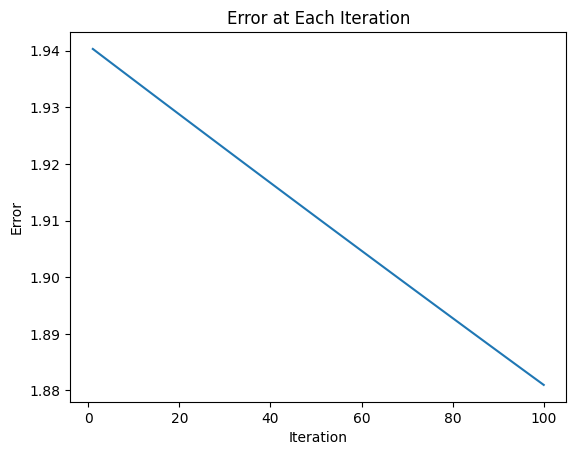

In [ ]:
# Initialize an array to store the error at each iteration
errors = []


# Perform gradient descent for the specified number of iterations
for iteration in range(num_iterations):
    # Calculate the predicted values based on the current m and b
    y_pred = m * x_standardized + b

    # Calculate the mean squared error
    error = np.mean((y_pred - y_standardized) ** 2)
    errors.append(error)

    # Calculate the gradient partial derivatives
    dm = (2 / len(x_standardized)) * np.sum((y_pred - y_standardized) * x_standardized)
    db = (2 / len(x_standardized)) * np.sum(y_pred - y_standardized)

    # Update m and b using gradient descent
    m = m - alpha * dm
    b = b - alpha * db

# Plot the error at each iteration
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

The error at each iteration shows a proportional relation as the number of iterations increase the error decreases. The error begins at 1.94 for the initialization and decreases to 1.88 after the 100th iteration.

**2000 iterations:**

Updated m: -0.050106213888014464
Updated b: -2.1378010472972177e-17


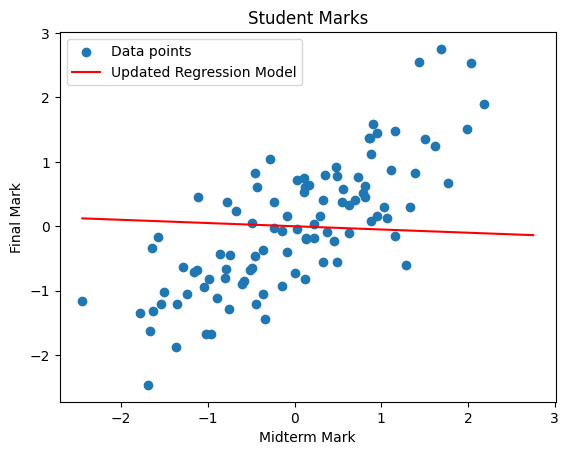

In [ ]:
#sets the number of iteration
num_iterations = 2000
#looping gradient descent algorithm
for _ in range(num_iterations):
    #Predicted value calculations
    y_pred = m * x_standardized + b

    #derivatives
    dm = (2 / len(x_standardized)) * np.sum((y_pred - y_standardized) * x_standardized)
    db = (2 / len(x_standardized)) * np.sum(y_pred - y_standardized)

    #updating m and b
    m = m - alpha * dm
    b = b - alpha * db
#plotting
plt.scatter(x_standardized, y_standardized, label = 'Data points')
x = np.linspace(min(x_standardized), max(y_standardized), 2000)
y = m*x+b
plt.plot(x, y, color = 'red', label = 'Updated Regression Model')

print("Updated m:", m)
print("Updated b:", b)

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Student Marks')
plt.legend()
plt.show()

After 2000 iterations, the regression model is overtrained and does not very accurately predict future values for the final mark based off the midterm mark.

**Error for 2000 iterations:**

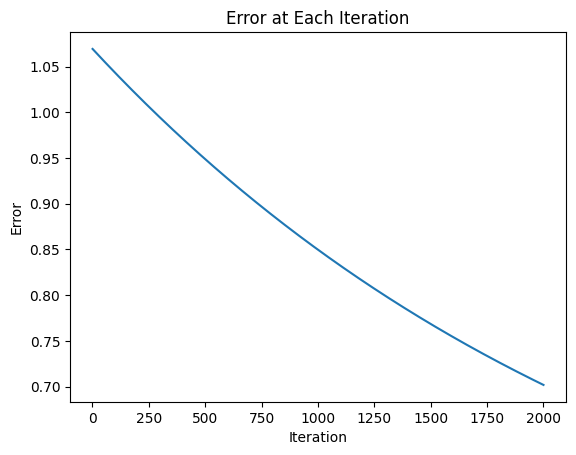

In [ ]:
# Initialize an array to store the error at each iteration
errors = []


# Perform gradient descent for the specified number of iterations
for iteration in range(num_iterations):
    # Calculate the predicted values based on the current m and b
    y_pred = m * x_standardized + b

    # Calculate the mean squared error
    error = np.mean((y_pred - y_standardized) ** 2)
    errors.append(error)

    # Calculate the gradient partial derivatives
    dm = (2 / len(x_standardized)) * np.sum((y_pred - y_standardized) * x_standardized)
    db = (2 / len(x_standardized)) * np.sum(y_pred - y_standardized)

    # Update m and b using gradient descent
    m = m - alpha * dm
    b = b - alpha * db

# Plot the error at each iteration
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

The error for 2000 iteration shows a decreasing trend staring at 1.05 and ending at 0.70 after the 2000th iteration.

#**Linear Regression using Non-Standardized Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


marks = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print(marks)

midterm_marks = marks['Midterm mark']
final_marks = marks['Final mark']

m = -0.5
b = 0
x = np.linspace(25,71,100)
y = m*x+b

mean_midterm = marks['Midterm mark'].mean()
mean_final = marks['Final mark'].mean()

std_mid = marks['Midterm mark'].std()
std_final = marks['Final mark'].std()

print("Midterm Standard Deviation:", std_mid)
print("Final Standard Deviation:",mean_final)

print("Midterm Mean:", mean_midterm)
print("Final Mean:",mean_final)

    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]
Midterm Standard Deviation: 9.746494785617061
Final Standard Deviation: 72.735
Midterm Mean: 48.959
Final Mean: 72.735


**Error (Cost Function):**

In [ ]:
def mean_squared_error(y_true, y_pred):
    """
    Calculates the mean squared error between the true values and the predicted values.

    Arguments:
    y_true -- numpy array or pandas Series, true values
    y_pred -- numpy array or pandas Series, predicted values

    Returns:
    mse -- float, mean squared error
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse


# Assuming you have already trained your linear regression model and obtained the predicted values
# Let's say the true final marks are stored in `y_true` and the predicted final marks are stored in `y_pred`

y_true = final_marks
y_pred = m * midterm_marks + b  # Example of predicted values using your existing implementation

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9873.218075


**Gradient Partial Derivative**

In [ ]:
dm = (2 / len(midterm_marks)) * np.sum((y_pred - final_marks) * midterm_marks)
db = (2 / len(midterm_marks)) * np.sum((y_pred - final_marks))

print("Partial Derivative with respect to m:", dm)
print("Partial Derivative with respect to b:", db)

Partial Derivative with respect to m: -9861.7451
Partial Derivative with respect to b: -194.42900000000003


**Updating m and b (100) iterations**

Updated m: 1.4785727560143909
Updated b: 0.04490536397288713


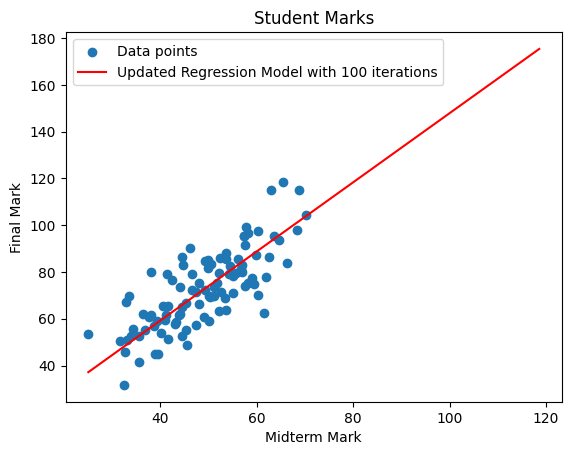

In [ ]:
#sets the number of iteration
num_iterations = 100
#looping gradient descent algorithm
for _ in range(num_iterations):
    #Predicted value calculations
    y_pred = m * midterm_marks + b

    dm = (2 / len(midterm_marks)) * np.sum((y_pred - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum((y_pred - final_marks))

    m = m - alpha * dm
    b = b - alpha * db

plt.scatter(midterm_marks, final_marks, label = 'Data points')
x = np.linspace(min(midterm_marks), max(final_marks), 100)
y = m*x+b
plt.plot(x, y, color = 'red', label = 'Updated Regression Model with 100 iterations')

print("Updated m:", m)
print("Updated b:", b)

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Student Marks')
plt.legend()
plt.show()

The regression model fits fairly accurately with the non-standardized data.

**Error for 100 Iterations:**

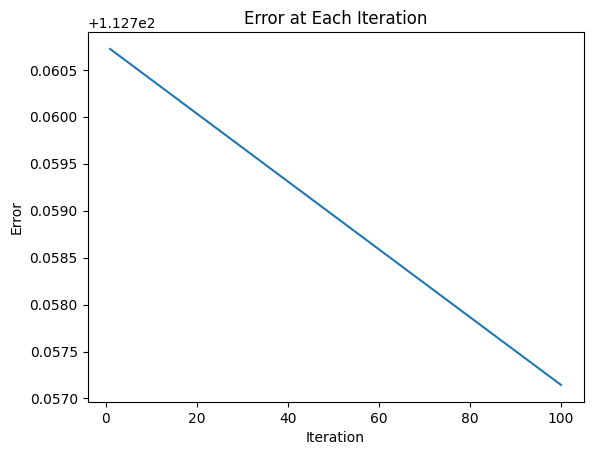

In [ ]:
# Initialize an array to store the error at each iteration
errors = []


# Perform gradient descent for the specified number of iterations
for iteration in range(num_iterations):
    # Calculate the predicted values based on the current m and b
    y_pred = m * midterm_marks + b

    # Calculate the mean squared error
    error = np.mean((y_pred - final_marks) ** 2)
    errors.append(error)

    # Calculate the gradient partial derivatives
    dm = (2 / len(midterm_marks)) * np.sum((y_pred - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum(y_pred - final_marks)

    # Update m and b using gradient descent
    m = m - alpha * dm
    b = b - alpha * db

# Plot the error at each iteration
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

The error at each iteration is also much less for the non-standardized model as for the initialization it is 0.0605 and ends at 0.0570 for the 100th iteration.

**Updating m and b (2000 iterations):**

Updated m: 1.4761104789527106
Updated b: 0.17018382013596003


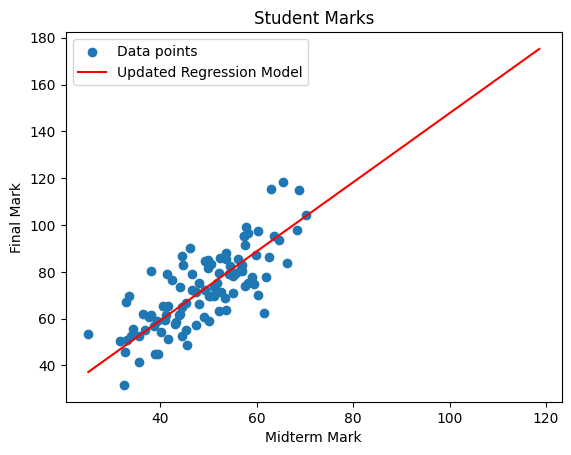

In [ ]:
#sets the number of iteration
num_iterations = 2000
#looping gradient descent algorithm
for _ in range(num_iterations):
    #Predicted value calculations
    y_pred = m * midterm_marks + b

    #derivatives
    dm = (2 / len(midterm_marks)) * np.sum((y_pred - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum(y_pred - final_marks)

    #updating m and b
    m = m - alpha * dm
    b = b - alpha * db
#plotting
plt.scatter(midterm_marks, final_marks, label = 'Data points')
x = np.linspace(min(midterm_marks), max(final_marks), 2000)
y = m*x+b
plt.plot(x, y, color = 'red', label = 'Updated Regression Model')

print("Updated m:", m)
print("Updated b:", b)

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Student Marks')
plt.legend()
plt.show()

**Error for 2000 iterations:**

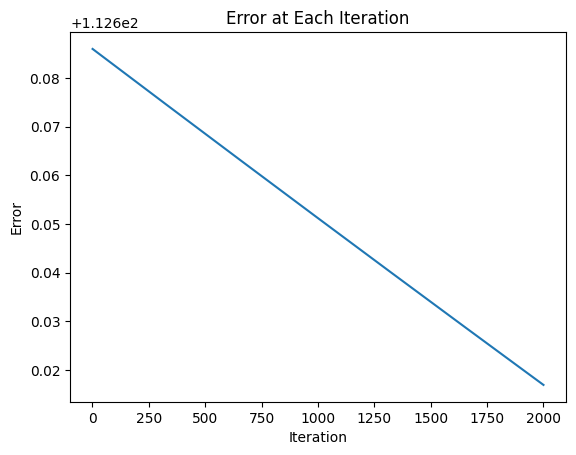

In [ ]:
# Initialize an array to store the error at each iteration
errors = []


# Perform gradient descent for the specified number of iterations
for iteration in range(num_iterations):
    # Calculate the predicted values based on the current m and b
    y_pred = m * midterm_marks + b

    # Calculate the mean squared error
    error = np.mean((y_pred - final_marks) ** 2)
    errors.append(error)

    # Calculate the gradient partial derivatives
    dm = (2 / len(midterm_marks)) * np.sum((y_pred - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum(y_pred - final_marks)

    # Update m and b using gradient descent
    m = m - alpha * dm
    b = b - alpha * db

# Plot the error at each iteration
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

# Verification using scikit library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

marks = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")

x = marks[['Midterm mark']].values.reshape(-1,1)
y = marks['Final mark']

mean_midterm = np.mean(x)
mean_final = np.mean(y)

std_mid = np.std(x)
std_final = np.std(y)



x_standardized = (x - mean_midterm)/std_mid
y_standardized = (y - mean_final)/std_final


reg_std = LinearRegression()
reg_nonstd = LinearRegression()

reg_std.fit(x_standardized, y_standardized)
reg_nonstd.fit(x, y)

m_std = reg_std.coef_[0]
b_std = reg_std.intercept_
m_nonstd = reg_nonstd.coef_[0]
b_nonstd = reg_nonstd.intercept_

print("Standardized data: m =", m_std, "b =", b_std)
print("Non-standardized data: m =", m_nonstd, "b =", b_nonstd)


Standardized data: m = 0.7734781435681737 b = 2.5515431945611573e-16
Non-standardized data: m = 1.321992317252377 b = 8.01157813964086
